<a href="https://colab.research.google.com/github/AlbertIR12/Python/blob/main/Portofolio_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Kinerja Siswa dalam Ujian,  11 September 2022

Pada karnel di bawah ini, akan dianalisis `Kinerja Siswa dalam Ujian` untuk melihat bagaimana nilai ujian siswa yang dipengaruhi oleh beberapa variabel yang berbeda, yang meliputi jenis kelamin, ras, makan siang, kursus persiapan ujian, dll.

Analisis `Kinerja Siswa dalam Ujian` dilakukan dengan menggunakan data CSV yang sudah diperoleh dari file **StudentsPerformance.csv** dari *Google Drive*. 

`Data Source` = https://drive.google.com/file/d/1wNyLfd6mJCwy8TmwjbFjeR90bhAEqR62/view?usp=sharing

In [1]:
# Mengimport EDA libraries.
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Menunjukkan data dan sampelnya
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Menampilkan informasi singkat tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Dari informasi singkat di atas, dapat diketahui bahwa ada **1000 baris, 8 kolom dan tidak ada nilai nol** dalam kumpulan data ini.

In [4]:
# Menampilkan beberapa statistik deskriptif dari data
df.describe()

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


Dari Tabel di atas, ditunjukkan bahwa semua skor memiliki nilai antara 0 dan 100 dengan distribusi yang sangat mirip.

Pada sel di bawah ini, terdapat 4 fungsi program, yang terdiri dari 2 fungsi untuk pie chart dan 2 fungsi untuk diagram batang.

- Fungsi program pie chart digunakan untuk membuat diagram lingkaran dan memploting presentase beberapa kolom ke kolom lainnya pada pie chart. 
- Fungsi program diagram batang digunakan untuk mencari distribusi dan menampilkan diagram batang rata-rata menjadi beberapa kolom.

In [5]:
def percentage(col,df=df): # Fungsi yang dapat mengembalikan diagram lingkaran
    return px.pie(df, names=col, title=f'{col} percentage')

def percentages(cols, data = df,size=(1000,1000)): # Fungsi yang memploting persentase beberapa kolom ke kolom lainnya
    grouped = data[cols].groupby(cols).size().sort_values(ascending = False).reset_index().rename(columns={0:'percentage'})
    list_of_groups = []
    for col in cols[:-1]:
        for unique in data[col].unique():
            list_of_groups.append(grouped[grouped[col] == unique])
    grouped_t_c = pd.concat(list_of_groups)
    
    fig = px.sunburst(grouped_t_c, path=cols, values = 'percentage')
    
    fig.update_traces(textinfo='label+percent entry')
    fig.update_layout(autosize=False, width=size[0], height=size[1])
    fig.show()
    
def dist(x,by = None, c = None,data=df, log = False,  nbins=None ): # Fungsi yang digunakan untuk mendapatkan distribusi
    if by:
        for u in data[by].unique():
            print(f'Average {u} {x} = {round(data[data[by]==u][x].mean(),2)}')
            print(f'Most frequent {u} {x} = {round(data[data[by]==u][x].mode()[0],2)}')
    elif c:
        for u in data[c].unique():
            print(f'Average {u} {x} = {round(data[data[c]==u][x].mean(),2)}')
            print(f'Most frequent {u} {x} = {round(data[data[c]==u][x].mode()[0],2)}')
    else:
        print(f'Average {x} = {round(data[x].mean(),2)}')
        print(f'Most frequent {x} = {round(data[x].mode()[0],2)}')
    fig = px.histogram(data, x=x, facet_row = by, color = c, log_y=log,  nbins= nbins )
    fig.show()
    
def avg_for_each(x,data = df): # Fungsi yang menunjukkan diagram batang rata-rata menjadi beberapa kolom
    d = data.groupby([x]).mean().reset_index() # Mengelompokkan dataset
    fig = px.histogram(d ,x=x, y=d.columns[1:],
                  barmode='group')
    fig.update_layout(autosize=False, width=1000, height=600, xaxis_title=x,
                      yaxis_title="Count") # Pemformatan
    fig.show()

Untuk menampilkan pie chart presentase berdasarkan jenis kelamin, dapat dilakukan sebagai berikut.

In [6]:
percentage('gender') # Menampilkan Pie Chart presentase berdasarkan jenis kelamin

Untuk menampilkan pie chart presentase berdasarkan ras atau etnik, dapat dilakukan sebagai berikut.

In [7]:
percentage('race/ethnicity') # Menampilkan Pie Chart presentase berdasarkan ras atau etnik

Untuk mencari jenis kelamin apa yang paling umum dimiliki oleh setiap ras, dapat dilakukan sebagai berikut.

In [8]:
percentages(['race/ethnicity','gender'],size=(750,750)) # Menampilkan Irisan Pie Chart presentase dari ras dan jenis kelamin

Untuk menampilkan pie chart presentase berdasarkan tingkat pendidikan orang tua, dapat dilakukan sebagai berikut.

In [9]:
percentage('parental level of education') # Menampilkan Pie Chart presentase berdasarkan tingkat pendidikan orang tua

Untuk mencari jenis kelamin apa yang paling umum dimiliki oleh setiap ras dan yang paling umum dimiliki oleh setiap tingkat pendidikan orang tua, dapat dilakukan sebagai berikut.

In [10]:
percentages(['parental level of education','race/ethnicity','gender'])

Untuk menampilkan pie chart presentase berdasarkan jenis makan siang, dapat dilakukan sebagai berikut.

In [11]:
percentage('lunch')

Untuk mencari jenis kelamin apa yang paling umum dimiliki oleh setiap jenis makan siang dan ras yang paling umum dimiliki oleh setiap tingkat pendidikan orang tua, dapat dilakukan sebagai berikut.

In [12]:
percentages(['parental level of education','race/ethnicity','lunch','gender'],size=(1100,1100))

Untuk menampilkan pie chart presentase berdasarkan jenis kursus persiapan ujian, dapat dilakukan sebagai berikut.

In [13]:
percentage('test preparation course')

Untuk mencari jenis kelamin apa yang paling umum dimiliki oleh setiap jenis kursus persiapan ujian dan ras yang paling umum dimiliki oleh setiap tingkat pendidikan orang tua, dapat dilakukan sebagai berikut.

In [14]:
percentages(['parental level of education','race/ethnicity','test preparation course','gender'],size=(1100,1100))

Untuk mencari distribusi skor pada setiap jenis kelamin,  dapat dilakukan sebagai berikut.

In [15]:
df['total'] = df['math score']+df['reading score']+df['writing score']
    
for col in ['math score','reading score','writing score','total']:
    dist(col,c='gender')

Average female math score = 63.63
Most frequent female math score = 65
Average male math score = 68.73
Most frequent male math score = 62


Average female reading score = 72.61
Most frequent female reading score = 72
Average male reading score = 65.47
Most frequent male reading score = 66


Average female writing score = 72.47
Most frequent female writing score = 70
Average male writing score = 63.31
Most frequent male writing score = 68


Average female total = 208.71
Most frequent female total = 223
Average male total = 197.51
Most frequent male total = 205


Dari Grafik di atas, laki-laki hanya mendapat nilai lebih tinggi dalam matematika daripada perempuan, tetapi perempuan mendapat nilai lebih tinggi daripada laki-laki dalam membaca dan menulis. Perempuan juga mendapatkan nilai total yang lebih tinggi dari pada laki-laki.

Kemudian, ras mana yang mendapatkan nilai dengan skor terbaik?

In [16]:
avg_for_each('race/ethnicity')

Dari Grafik di atas, ditunjukkan bahwa grup E memiliki nilai total terbaik dibandingakan 4 grup lainnya. Grup E juga satu-satunya grup yang memiliki nilai matematika lebih tinggi dari nilai 4 grup lainnya.

Kemudian, tingkat pendidikan orang tua dari siswa mana yang memiliki skor lebih tinggi?

In [17]:
avg_for_each('parental level of education')

Dari Grafik di atas, diketahui bahwa siswa yang memiliki tingkat pendidikan orang tua dari gelar master memiliki skor yang lebih tinggi.

Untuk mencari distribusi skor pada setiap jenis makan siang,  dapat dilakukan sebagai berikut.

In [18]:
for col in ['math score','reading score','writing score','total']:
    dist(col,c='lunch')

Average standard math score = 70.03
Most frequent standard math score = 69
Average free/reduced math score = 58.92
Most frequent free/reduced math score = 61


Average standard reading score = 71.65
Most frequent standard reading score = 64
Average free/reduced reading score = 64.65
Most frequent free/reduced reading score = 58


Average standard writing score = 70.82
Most frequent standard writing score = 74
Average free/reduced writing score = 63.02
Most frequent free/reduced writing score = 54


Average standard total = 212.51
Most frequent standard total = 198
Average free/reduced total = 186.6
Most frequent free/reduced total = 155


Dari Grafik di atas, siswa yang mendapat makan siang gratis memiliki nilai yang lebih rendah daripada siswa dengan jenis makan lainnya.

Untuk mencari distribusi skor pada setiap jenis pengambilan kursus persiapan ujian, dapat dilakukan sebagai berikut.

In [19]:
for col in ['math score','reading score','writing score','total']:
    dist(col,c='test preparation course')

Average none math score = 64.08
Most frequent none math score = 62
Average completed math score = 69.7
Most frequent completed math score = 65


Average none reading score = 66.53
Most frequent none reading score = 72
Average completed reading score = 73.89
Most frequent completed reading score = 74


Average none writing score = 64.5
Most frequent none writing score = 74
Average completed writing score = 74.42
Most frequent completed writing score = 68


Average none total = 195.12
Most frequent none total = 155
Average completed total = 218.01
Most frequent completed total = 198


Dari Grafik di atas, siswa yang telah mengambil kursus persiapan ujian memiliki nilai yang lebih tinggi dari yang lain.

Untuk mencari korelasi skor satu sama lain, dapat dilakukan sebagai berikut.

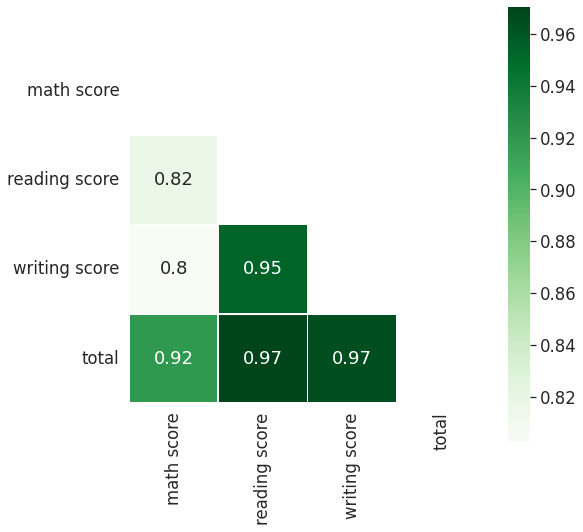

In [20]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="Greens",annot=True)

Dari Grafik di atas, dapat diketahui bahwa terdapat korelasi yang kuat antara skor membaca dan menulis. Selain itu, skor membaca dan menulis lebih berkorelasi dengan skor total daripada skor matematika.